### 多项式回归实战-天猫销量预测【双十一】

- 归一化时，训练数据用fit_transform,测试数据用transform
- 是否包含截距项，多项式升维/模型里的参数
- 最后画图时，用Z-score标准化后的数据当x轴，画出来不太像曲线（还原为原来的年份就像了），最大最小值标准化的画出来就像曲线

#### 创造数据

In [1]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import numpy as np
from sklearn.linear_model import SGDRegressor

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

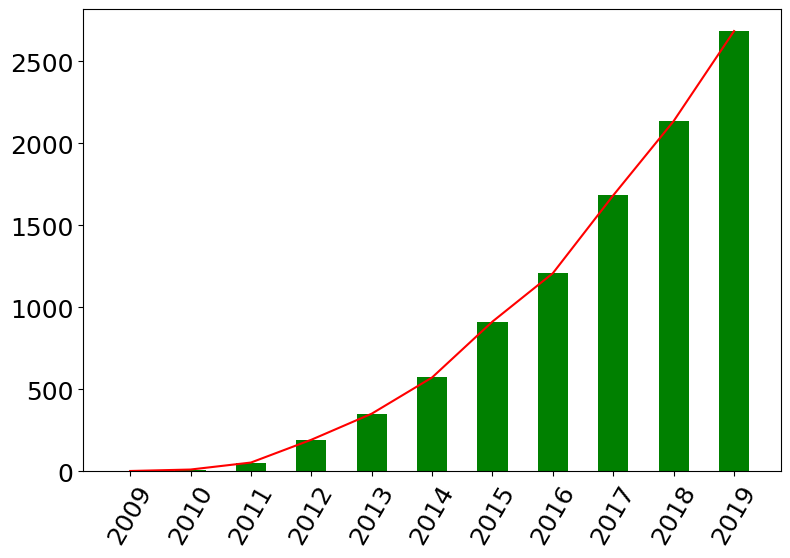

In [2]:
# 创建数据，年份数据2009 ~ 2019
X = np.arange(2009,2020) # 一维，注意机器学习模型中必须是二维的
# 天猫双十一销量
y = np.array([0.5,9.36,52,191,350,571,912,1207,1682,2135,2684])

plt.figure(figsize=(9,6))
plt.bar(X,y,width = 0.5,color = 'green') # 条形图
plt.plot(X,y,color = 'red') # 线形图
_ = plt.xticks(ticks = X,rotation = 60) # X轴刻度，设置成2009 - 2019
# 不用_ = plt.xticks会额外返回 坐标文字

#### 将数据X进行转换

In [3]:
display(X.shape)
X = X.reshape(-1,1)
display(X.shape)

(11,)

(11, 1)

In [4]:
X_backup = X
X_backup
# 年份数字相差1
# 基数太大，导致差异不明显，算法难以找规律

array([[2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

#### 特征工程

如果没有这一步，是无法拟合的

In [5]:
# X -= np.int32(X.mean())  还可以减均值
# X 

In [6]:
X -= 2008
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

#### 升维处理

特征太少，进行升维处理

In [7]:
np.set_printoptions(suppress=True) # 科学计数法，就不显示

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3,include_bias=True) # 包含截距

X = poly.fit_transform(X)
display(X)

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.],
       [   1.,   11.,  121., 1331.]])

#### 归一化【算法中，包含梯度下降，都需要归一化】

In [9]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X = mms.fit_transform(X)
X
# 可以看到第一列全是0，截距项相当于没有

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.1       , 0.025     , 0.00526316],
       [0.        , 0.2       , 0.06666667, 0.01954887],
       [0.        , 0.3       , 0.125     , 0.04736842],
       [0.        , 0.4       , 0.2       , 0.09323308],
       [0.        , 0.5       , 0.29166667, 0.16165414],
       [0.        , 0.6       , 0.4       , 0.25714286],
       [0.        , 0.7       , 0.525     , 0.38421053],
       [0.        , 0.8       , 0.66666667, 0.54736842],
       [0.        , 0.9       , 0.825     , 0.75112782],
       [0.        , 1.        , 1.        , 1.        ]])

#### SGD建模

In [10]:
model = SGDRegressor(fit_intercept=False)

# 以往的数据，2009 到 2019
model.fit(X,y) # 建模

# warning：到达设置的迭代次数后仍未收敛
# Consider increasing max_iter to improve the fit

D:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(fit_intercept=False)

#### 算法验证【效果】

In [11]:
# 最大最小值归一化
X_test = np.linspace(1,12).reshape(-1,1) # 1表示2009，12表示2020   必须要是二维的
X_test = poly.fit_transform(X_test)  # 训练集升维了，测试集也需要升维

# 直接使用transform，相当于使用数据X的平均值和标准差，作为归一化的计算指标
X_test = mms.transform(X_test) 
X_test[:10]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.02244898, 0.00416146, 0.00062855],
       [0.        , 0.04489796, 0.00916285, 0.00153548],
       [0.        , 0.06734694, 0.01500416, 0.00277184],
       [0.        , 0.08979592, 0.02168541, 0.00438866],
       [0.        , 0.1122449 , 0.02920658, 0.00643698],
       [0.        , 0.13469388, 0.03756768, 0.00896784],
       [0.        , 0.15714286, 0.04676871, 0.01203227],
       [0.        , 0.17959184, 0.05680966, 0.01568131],
       [0.        , 0.20204082, 0.06769055, 0.019966  ]])

In [12]:
# 算法根据以往的双十一销售规律，进行的预测
y_ = model.predict(X_test)
y_

array([   0.        ,   20.91670166,   42.80183495,   65.70076117,
         89.65884163,  114.72143763,  140.93391049,  168.34162152,
        196.98993202,  226.92420331,  258.18979668,  290.83207346,
        324.89639494,  360.42812244,  397.47261727,  436.07524073,
        476.28135413,  518.13631879,  561.685496  ,  606.97424708,
        654.04793334,  702.95191608,  753.73155662,  806.43221626,
        861.09925631,  917.77803808,  976.51392287, 1037.35227201,
       1100.33844679, 1165.51780852, 1232.93571852, 1302.63753808,
       1374.66862853, 1449.07435116, 1525.9000673 , 1605.19113823,
       1686.99292528, 1771.35078975, 1858.31009295, 1947.9161962 ,
       2040.21446079, 2135.25024803, 2233.06891924, 2333.71583573,
       2437.23635879, 2543.67584975, 2653.07966991, 2765.49318057,
       2880.96174306, 2999.53071866])

#### 可视化查看拟合效果

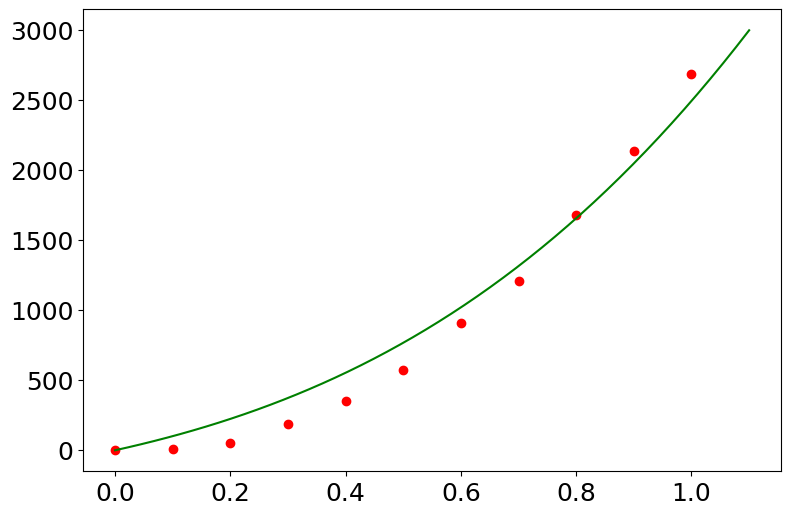

In [13]:
plt.figure(figsize=(9,6))
plt.scatter(X[:,1],y,color = 'red')

plt.plot(X_test[:,1],y_,color = 'green')

D:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


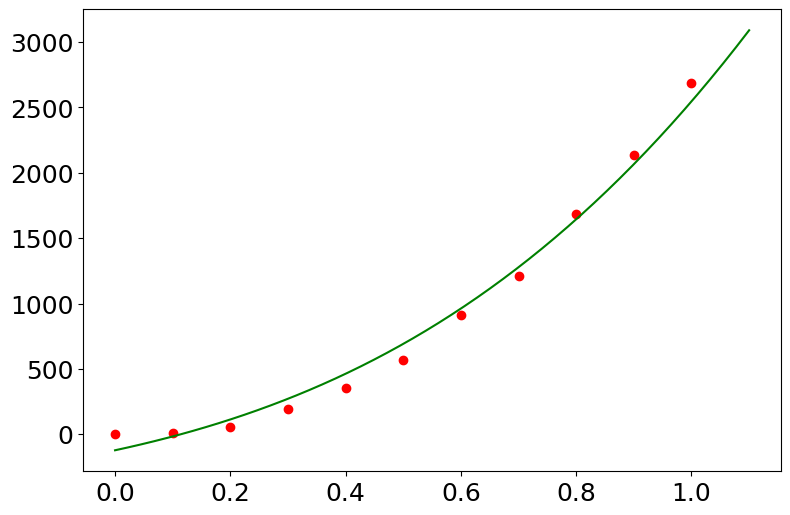

In [14]:
# 如果截距设置为True
model = SGDRegressor(fit_intercept=True)

# 以往的数据，2009 到 2019
model.fit(X,y) # 建模

# 最大最小值归一化
X_test = np.linspace(1,12).reshape(-1,1) # 1表示2009，12表示2020   必须要是二维的
X_test = poly.fit_transform(X_test)  # 训练集升维了，测试集也需要升维

# 直接使用transform，相当于使用数据X的平均值和标准差，作为归一化的计算指标
X_test = mms.transform(X_test) 

# 算法根据以往的双十一销售规律，进行的预测
y_ = model.predict(X_test)

plt.figure(figsize=(9,6))
plt.scatter(X[:,1],y,color = 'red')

plt.plot(X_test[:,1],y_,color = 'green')

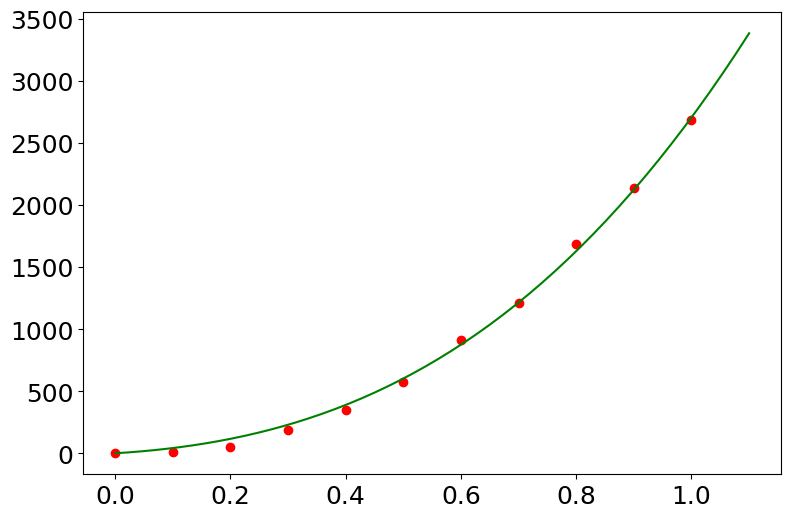

In [15]:
# SGDRegressor的截距仍为False  但增加迭代次数
model = SGDRegressor(fit_intercept=False, max_iter=5000,eta0=0.5)

# 以往的数据，2009 到 2019
model.fit(X,y) # 建模

# 最大最小值归一化
X_test = np.linspace(1,12).reshape(-1,1) # 1表示2009，12表示2020   必须要是二维的
X_test = poly.fit_transform(X_test)  # 训练集升维了，测试集也需要升维

# 直接使用transform，相当于使用数据X的平均值和标准差，作为归一化的计算指标
X_test = mms.transform(X_test) 

# 算法根据以往的双十一销售规律，进行的预测
y_ = model.predict(X_test)

plt.figure(figsize=(9,6))
plt.scatter(X[:,1],y,color = 'red')

plt.plot(X_test[:,1],y_,color = 'green')

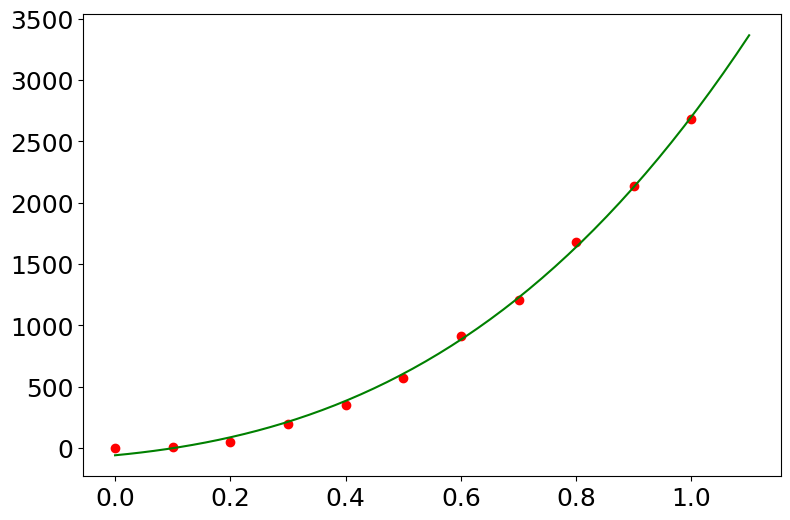

In [15]:
# True  增加迭代次数
model = SGDRegressor(fit_intercept=True, max_iter=5000,eta0=0.5)

# 以往的数据，2009 到 2019
model.fit(X,y) # 建模

# 最大最小值归一化
X_test = np.linspace(1,12).reshape(-1,1) # 1表示2009，12表示2020   必须要是二维的
X_test = poly.fit_transform(X_test)  # 训练集升维了，测试集也需要升维

# 直接使用transform，相当于使用数据X的平均值和标准差，作为归一化的计算指标
X_test = mms.transform(X_test) 

# 算法根据以往的双十一销售规律，进行的预测
y_ = model.predict(X_test)

plt.figure(figsize=(9,6))
plt.scatter(X[:,1],y,color = 'red')

plt.plot(X_test[:,1],y_,color = 'green')

### 升维时也不包括截距项

In [ ]:
# 这张图可以发现拟合的销量曲线出现了负数
# 处理：在升维时也不包括截距项

In [16]:
# 升维
from sklearn.preprocessing import PolynomialFeatures

X = X_backup
poly = PolynomialFeatures(degree=3,include_bias=False) # 不包含截距

X = poly.fit_transform(X)
display(X)

array([[   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.],
       [   6.,   36.,  216.],
       [   7.,   49.,  343.],
       [   8.,   64.,  512.],
       [   9.,   81.,  729.],
       [  10.,  100., 1000.],
       [  11.,  121., 1331.]])

In [17]:
# 归一化
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

X = standard.fit_transform(X)
X

array([[-1.58113883, -1.15498576, -0.92062337],
       [-1.26491106, -1.0779867 , -0.90430853],
       [-0.9486833 , -0.94965495, -0.86002538],
       [-0.63245553, -0.7699905 , -0.77378977],
       [-0.31622777, -0.53899335, -0.63161755],
       [ 0.        , -0.2566635 , -0.41952458],
       [ 0.31622777,  0.07699905, -0.12352668],
       [ 0.63245553,  0.4619943 ,  0.27036028],
       [ 0.9486833 ,  0.89832225,  0.77612046],
       [ 1.26491106,  1.38598291,  1.40773802],
       [ 1.58113883,  1.92497626,  2.1791971 ]])

D:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


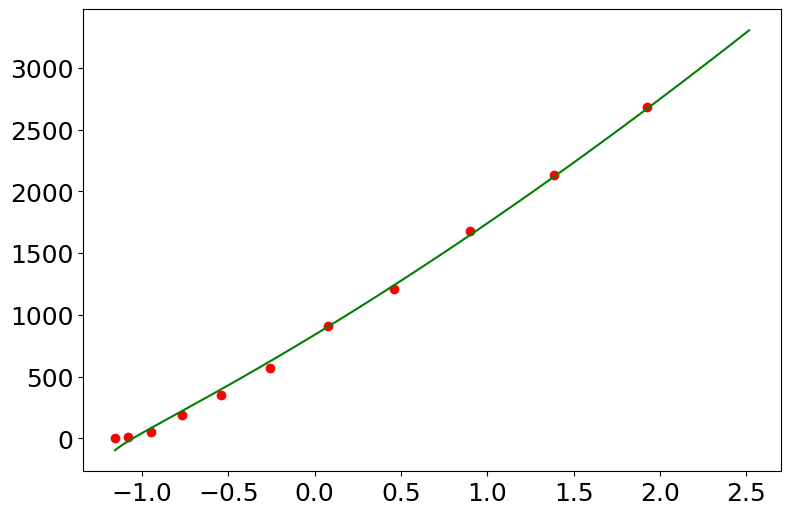

In [18]:
# True  
model = SGDRegressor(fit_intercept=True)

# 以往的数据，2009 到 2019
model.fit(X,y) # 建模

# 归一化
X_test = np.linspace(1,12).reshape(-1,1) # 1表示2009，12表示2020   必须要是二维的
X_test = poly.fit_transform(X_test)  # 训练集升维了，测试集也需要升维

# 直接使用transform，相当于使用数据X的平均值和标准差，作为归一化的计算指标
X_test = standard.transform(X_test) # 直接使用standard进行转换

# 算法根据以往的双十一销售规律，进行的预测
y_ = model.predict(X_test)

plt.figure(figsize=(9,6))
plt.scatter(X[:,1],y,color = 'red')

plt.plot(X_test[:,1],y_,color = 'green')

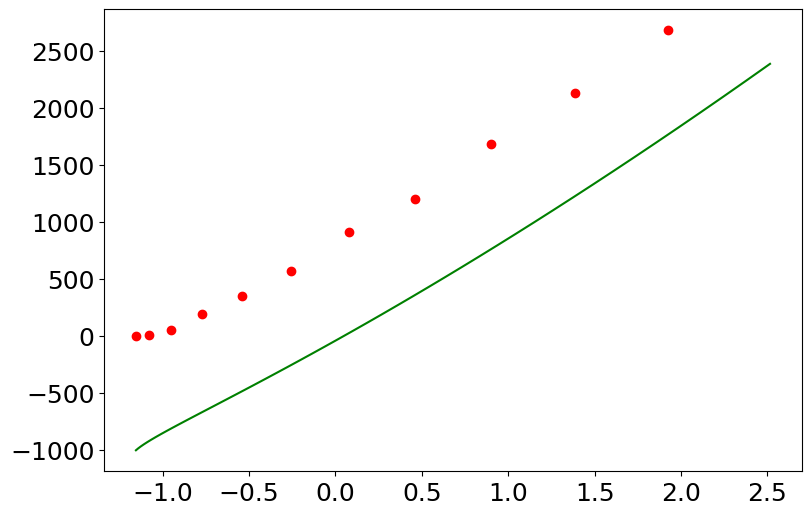

In [19]:
# False  
model = SGDRegressor(fit_intercept=False) 

# 以往的数据，2009 到 2019
model.fit(X,y) # 建模

# 归一化
X_test = np.linspace(1,12).reshape(-1,1) # 1表示2009，12表示2020   必须要是二维的
X_test = poly.fit_transform(X_test)  # 训练集升维了，测试集也需要升维

# 直接使用transform，相当于使用数据X的平均值和标准差，作为归一化的计算指标
X_test = standard.transform(X_test) # 直接使用standard进行转换

# 算法根据以往的双十一销售规律，进行的预测
y_ = model.predict(X_test)

plt.figure(figsize=(9,6))
plt.scatter(X[:,1],y,color = 'red')

plt.plot(X_test[:,1],y_,color = 'green')

D:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


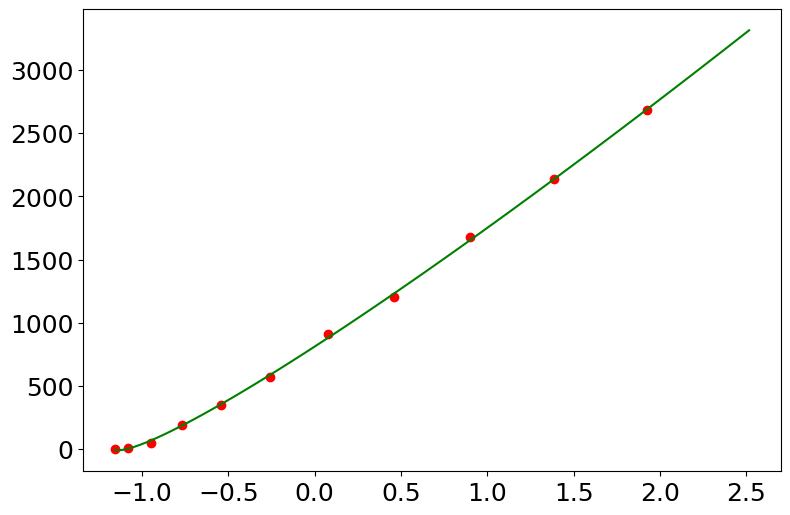

In [20]:
# True  增加迭代次数
model = SGDRegressor(fit_intercept=True, max_iter=5000,eta0=0.5)

# 以往的数据，2009 到 2019
model.fit(X,y) # 建模

# 归一化
X_test = np.linspace(1,12).reshape(-1,1) # 1表示2009，12表示2020   必须要是二维的
X_test = poly.fit_transform(X_test)  # 训练集升维了，测试集也需要升维

# 直接使用transform，相当于使用数据X的平均值和标准差，作为归一化的计算指标
X_test = standard.transform(X_test) # 直接使用standard进行转换

# 算法根据以往的双十一销售规律，进行的预测
y_ = model.predict(X_test)

plt.figure(figsize=(9,6))
plt.scatter(X[:,1],y,color = 'red')

plt.plot(X_test[:,1],y_,color = 'green')

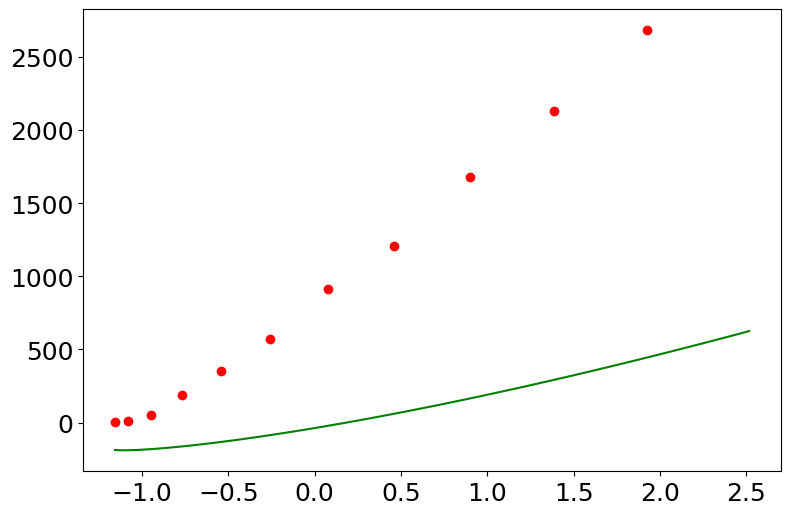

In [21]:
# False  增加迭代次数
model = SGDRegressor(fit_intercept=False, max_iter=5000,eta0=0.5) 

# 以往的数据，2009 到 2019
model.fit(X,y) # 建模

# 归一化
X_test = np.linspace(1,12).reshape(-1,1) # 1表示2009，12表示2020   必须要是二维的
X_test = poly.fit_transform(X_test)  # 训练集升维了，测试集也需要升维

# 直接使用transform，相当于使用数据X的平均值和标准差，作为归一化的计算指标
X_test = standard.transform(X_test) # 直接使用standard进行转换

# 算法根据以往的双十一销售规律，进行的预测
y_ = model.predict(X_test)

plt.figure(figsize=(9,6))
plt.scatter(X[:,1],y,color = 'red')

plt.plot(X_test[:,1],y_,color = 'green')

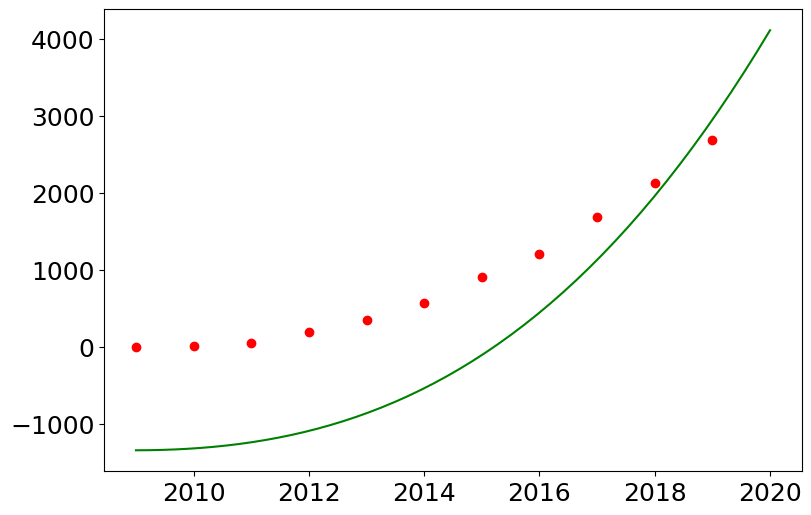

In [22]:
# False  增加迭代次数
# 设置坐标轴为年份
model = SGDRegressor(fit_intercept=False, max_iter=5000,eta0=0.5)

# 以往的数据，2009 到 2019
model.fit(X,y) # 建模

# 归一化
X_test = np.linspace(1,12).reshape(-1,1) # 1表示2009，12表示2020   必须要是二维的
X_test = poly.fit_transform(X_test)  # 训练集升维了，测试集也需要升维

# 直接使用transform，相当于使用数据X的平均值和标准差，作为归一化的计算指标
X_test = standard.transform(X_test) # 直接使用standard进行转换

# 算法根据以往的双十一销售规律，进行的预测
y_ = model.predict(X_test)

plt.figure(figsize=(9,6))
plt.scatter(np.arange(2009,2020),y,color = 'red')

plt.plot(np.linspace(2009,2020),y_,color = 'green')

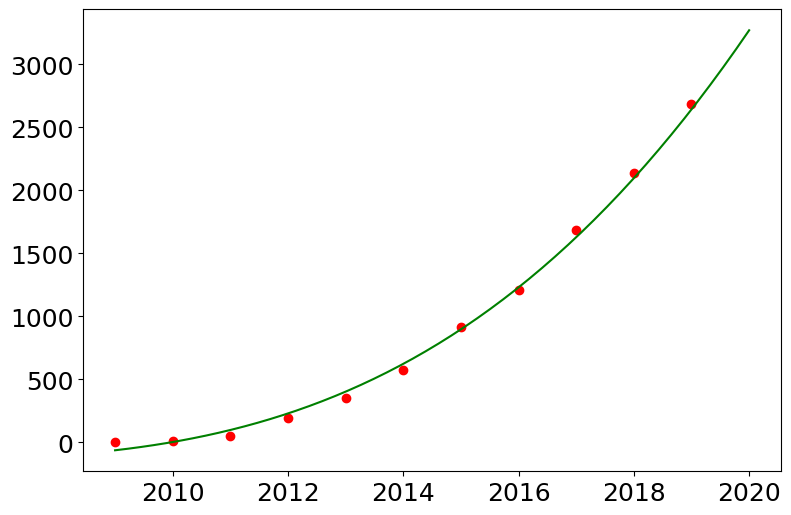

In [23]:
# True  增加迭代次数
# 设置坐标轴为年份
model = SGDRegressor(fit_intercept=True, max_iter=5000,eta0=0.5)

# 以往的数据，2009 到 2019
model.fit(X,y) # 建模

# 归一化
X_test = np.linspace(1,12).reshape(-1,1) # 1表示2009，12表示2020   必须要是二维的
X_test = poly.fit_transform(X_test)  # 训练集升维了，测试集也需要升维

# 直接使用transform，相当于使用数据X的平均值和标准差，作为归一化的计算指标
X_test = standard.transform(X_test) # 直接使用standard进行转换

# 算法根据以往的双十一销售规律，进行的预测
y_ = model.predict(X_test)

plt.figure(figsize=(9,6))
plt.scatter(np.arange(2009,2020),y,color = 'red')

plt.plot(np.linspace(2009,2020),y_,color = 'green')